In [77]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mnist_reader

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

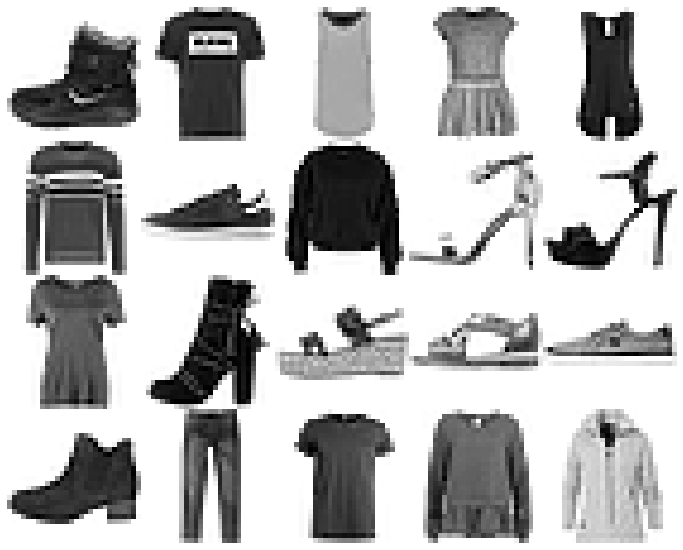

In [78]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size,image_size) for image in images]
    
    n_rows = (len(images)-1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(12,12))
plot_images_matrix(X_train[:20], 28, 5)
plt.show()

In [79]:
print(y_train[:20])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


## Resolvemos con SGDClassifier();

In [80]:
model_SGD = SGDClassifier(loss='log', random_state=55)
model_SGD.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=55)

In [81]:
y_test_predicted_SGD = model_SGD.predict(X_test)
matriz_confusion_SGD = np.array(confusion_matrix(y_test, y_test_predicted_SGD))
print(matriz_confusion_SGD)

[[797  27   5 103   4   0  43   0  20   1]
 [  0 968   0  23   2   0   2   1   3   1]
 [ 25  24 495  51 127   0 254   0  24   0]
 [ 15  61   4 882   8   1  18   1  10   0]
 [  2  15  35 137 606   0 185   0  20   0]
 [  1   3   0   1   1 875   0  57  18  44]
 [158  24  34 110  60   2 565   0  47   0]
 [  0   0   0   0   0  38   0 905   3  54]
 [  5   3   1  11   3   6   9   5 956   1]
 [  0   0   0   0   0  21   1  28   0 950]]


Los elementos de la diagonal de la matriz de confusión corresponden a las prendas de ropa 
correctamente clasificadas.

Vamos a sumar los elementos de la diagonal para saber el total de prendas correctamente clasificadas

In [82]:
suma = 0
for i in range(10):
    suma = suma + matriz_confusion_SGD[i][i]
    
print("Ropa correctamente clasificada =",suma)
print("Porcentaje de ropa correctamente clasificada =",suma/10000*100,"%")

Ropa correctamente clasificada = 7999
Porcentaje de ropa correctamente clasificada = 79.99000000000001 %


## Resolvemos con LogisticRegression()

In [83]:
model_logistic = LogisticRegression(C = 10**10)
model_logistic.fit(X_train,y_train)

/home/senior/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000)

In [84]:
y_test_predicted_logistic = model_logistic.predict(X_test)
matriz_confusion_logistic = np.array(confusion_matrix(y_test , y_test_predicted_logistic))
print(matriz_confusion_logistic)

[[809   5  17  45   9   0 100   0  15   0]
 [  3 958   3  27   4   0   3   0   2   0]
 [ 19   6 739  15 134   1  75   0  11   0]
 [ 28  14  16 858  39   1  39   0   5   0]
 [  0   1 111  36 773   1  70   0   8   0]
 [  1   0   0   1   0 888   1  56   8  45]
 [136   2 131  41 115   0 551   0  24   0]
 [  0   0   0   0   0  33   0 935   0  32]
 [  4   1   6  11   2   3  19   5 948   1]
 [  0   0   0   0   0  13   0  38   3 946]]


Los elementos de la diagonal de la matriz de confusión corresponden a las prendas de ropa 
correctamente clasificadas.

Vamos a sumar los elementos de la diagonal para saber el total de prendas correctamente clasificadas

In [85]:
suma = 0
for i in range(10):
    suma = suma + matriz_confusion_logistic[i][i]
    
print("Ropa correctamente clasificada =",suma)
print("Porcentaje de ropa correctamente clasificada =",suma/10000*100,"%")

Ropa correctamente clasificada = 8405
Porcentaje de ropa correctamente clasificada = 84.05 %


## Ahora resolvemos el problema con LogisticRegression()

El objetivo es que, si yo le doy una prenda al azar al programa, éste debe decir que tipo de prenda es.

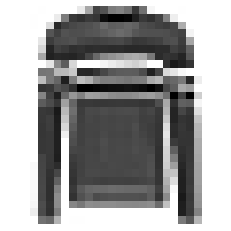

In [86]:
sample_number = 5
plt.imshow(X_train[sample_number][:].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

In [87]:
nombres = ["T-shirt/top","Trouser","Pullover","Dress","Coat"
           ,"Sandal","Shirt","Sneaker","Bag","Ankle boot"]
y_predict = model_logistic.predict(X_train[sample_number][:].reshape(1,-1))
print("Predicción =",nombres[y_predict[0]])
print("Real =",nombres[y_train[sample_number]])

Predicción = Pullover
Real = Pullover


Hacemos un programa para ver cuantas de las 60,000 prendas de X_train predice de forma correcta los dos algoritmos

In [88]:
y_predict_logistic = model_logistic.predict(X_train)
y_predict_SGD = model_SGD.predict(X_train)

lista_SGD = (y_predict_SGD == y_train)
lista_logistic = (y_predict_logistic == y_train)

### LogisticRegression()

In [89]:
print("Número de prendas correctamente clasificadas =",np.sum(lista_logistic))
print("Porcentaje de prendas correctamente clasificadas =",np.sum(lista_logistic)/len(y_train)*100,"%")

Número de prendas correctamente clasificadas = 51813
Porcentaje de prendas correctamente clasificadas = 86.355 %


### SGDClassifier()

In [90]:
print("Número de prendas correctamente clasificadas =",np.sum(lista_SGD))
print("Porcentaje de prendas correctamente clasificadas =",np.sum(lista_SGD)/len(y_train)*100,"%")

Número de prendas correctamente clasificadas = 49643
Porcentaje de prendas correctamente clasificadas = 82.73833333333333 %
